In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# the following codes are derived from https://gist.github.com/akesling/5358964
def ascii_show(image):
    for y in image:
        row = ""
        for x in y:
            row += '{:02x}'.format(x)
        print(row)

def read(dataset = "training", path = "."):
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError

    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return lbl, img

In [3]:
lbl, img = read(dataset="training", path="../data/")

In [4]:
def make_convoluted_images(imgs, num_imgs, pad_width, sobel_filter):
    convoluted_images_list = []
    
    for img_idx in range(num_imgs):
        image = imgs[img_idx]
        padded_image = np.lib.pad(image, pad_width, mode='edge')
        convoluted_image = np.zeros([28,28])
        
        size_filter = sobel_filter.shape[0]
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                convoluted_image[i, j] = np.sum(np.multiply(padded_image[i:i+size_filter, j:j+size_filter], sobel_filter), axis=None)
        
        convoluted_image = convoluted_image
        convoluted_images_list.append(convoluted_image)
    
    return convoluted_images_list

def plot_images(image_list):
    L = len(image_list)
    
    for i in range(L):
        plt.subplot(1, L, i + 1)
        plt.imshow(image_list[i], cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

In [5]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

## 1.  Use Gx and Gy to convolute the first five images in training set and plot the results

In [6]:
convoluted_images_Gx = make_convoluted_images(img, 5, (1, 1), Gx)
convoluted_images_Gy = make_convoluted_images(img, 5, (1, 1), Gy)

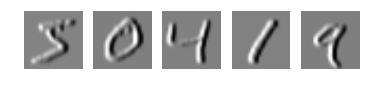

In [7]:
plot_images(convoluted_images_Gx)

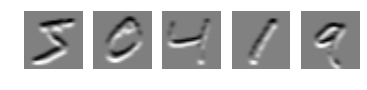

In [8]:
plot_images(convoluted_images_Gy)

## 2. Use sobel filters with different sizes (5x5, 7x7, and 9x9) to convolute the first image in training set and plot the results

The following function aims to make n-by-n sobel filters, and the results (when n = 3, 5, 7, 9) can be seen from the first answer [here](http://stackoverflow.com/questions/9567882/sobel-filter-kernel-of-large-size).

In [9]:
def make_sobel_filter(n):
    filter_ = np.zeros([n, n])
    
    first_col = np.array([range(n // 2, n), range(n-2, n // 2 - 1, -1)])
    first_col = np.concatenate(first_col, axis=0)
    
    for column in range(n//2):
        filter_[0:n, column] = first_col
        filter_[0:n, n - column -1] = -first_col
        first_col -= 1
    
    return filter_

In [10]:
img32x32_list = make_convoluted_images(img, 1, (2, 2), make_sobel_filter(5))
img32x32 = img32x32_list[0].astype("uint8")
ascii_show(img32x32)

00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000fad9cacd0aa850bf1e1b8be5ccf56dfe0000
000000000000c49a208c69c60593e9c67544b5a754419e92a9fd0000
00000000009e9970d80b468cdfbc1be8c06e4bb985004fd470bc0000
000000000049946ea85ef47c6fec96b3e2c289c6dad962f2247d0000
0000000000060665073b0dc2bc2d22b882b11e387f6617a6d2be0000
00000000002506b253966eb7fdb4abb0701208ebcc5e129d3b800000
000000000068fee1ce29113101e6b2be808740cc86cfdc974e000000
0000000000dc487f74b9c739c8245126d0b994b00000000000000000
000000000000604e6fce0bc969e43d2ab7d7c9360000000000000000
00000000000000e4f0feeb4f3216d7193396b70a3200000000000000
000000000000000000c99ff4f0f0b8cab328742b9236000000000000
000000000000000000ea10ebc3c6134fb40d554211c7000000000000
00000000000000000000ba08278c17c5c3ec71ec54cf800000000000
00000000000000000000005eec1c5b9bb9383b6b0148c40000000000
00000000000000000000b2b1be95d7b

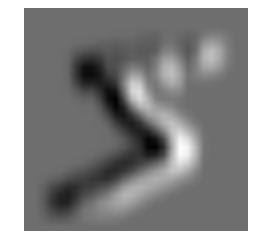

In [11]:
plot_images(img32x32_list)

In [12]:
img34x34_list = make_convoluted_images(img, 1, (3, 3), make_sobel_filter(7))
img34x34 = img34x34_list[0].astype("uint8")
ascii_show(img34x34)

00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
000000000000000000f7c4a3945372a4380357b0a6f21ae76ae37d00
0000000000a6588052822ae132bea07148f42271afa00a217b22bc00
000000006d5c1201795d948921caed90dd8b25c6970677fcdb107b00
00000000066af5adbb0fa08e53adad4bc4d6f4732660eefba4b03a00
00000000c35039878ba0ac92f027ef5904c59ec4e9c8e5c28364fb00
0000000080125ff41a0469b117022753d3c465d34e22262578123c00
000000009f12d941c99fcebbea52832a92ddfa9a1dc8af26af727d00
00000000e2ec273837896f097bab3fe1f30e55fa40755edcf165c000
0000000025a2b3bd55a0af6e4c4d6acf4648204740e6d28df6750000
00000000ca0b9bd70e81e9274c60204e7e8be4f2d64b000000000000
000000000010540917b9c7ad537372fddacea6e7385c510000000000
000000000000d6e1bf8b7375e6575038db35f8c852939d0000000000
0000000000000000332bd64e24a9f359be0a237d213edec000000000
0000000000000000df24c04d6a21f07e3e56ca39a15b5e0600000000
00000000000000000022990e6aa87ff927ebbe556fa72a4800000000
00000000000000b87ad125a0c021508

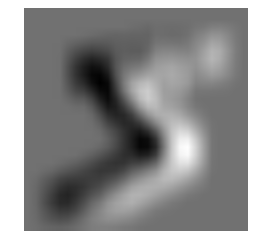

In [13]:
plot_images(img34x34_list)

In [14]:
img36x36_list = make_convoluted_images(img, 1, (4, 4), make_sobel_filter(9))
img36x36 = img36x36_list[0].astype("uint8")
ascii_show(img36x36)

00000000000000000000000000000000000000000000000000000000
0000000000000000f4af7c5b9c33b63cac4fc3fc9e12d64f02df59fc
000000008816e0189b34dc9340b229a7cd7f9144193cf953ade59b7b
0000003c1fb4480b210c43fc9665c446184841dd70136a3cf8a4b03a
000000c340addc2cc5be2b96ec19e674a86a53af53b1ce53b66d50f9
00000080d6051c7efa0c0fcd290a39d658d3cc35e9e4326a7436f0b8
0000003d5c99f7b2bf4e158933323d77ea9b11731647b815fc15a479
000000fa1edb310ca72ffd145d01d829cf6332e51fa2c604a00a52ba
000000191e559da509357e8d29cfb68eca3d8715985362ede241b2fb
0000005cf8a3d703f39a9285342cd06d01c77fcff426fed62478123c
0000009f72c9bf0951d4c412968b847453ff61e8c75817267f458f00
000000e246b3450f7f7973d149cddfd9ffbc394eddcc6c413e559c00
000000b8ceb78a3155015e45df27f6c0a1a4e311870b157300000000
00000000c05aa384fa5f35506fe65f7c0ed4f5a3a7adf6ed00000000
0000000000c8d28071608949c95f5afe14910ef394f0133e48000000
000000000000009d1ba0aed5e2cc8d5069010ad25a0971f68a000000
000000000000a0c47b8eff08c7c10866bafc7cfaca334b56cc000000
00000000a4b3405852756feba738188

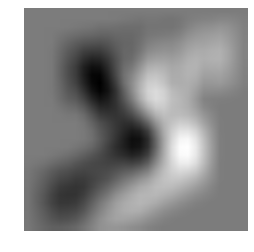

In [15]:
plot_images(img36x36_list)